# Ekstrak geometri sumber gempa dari data shp

Jalankan file ini di jupyter dengan cara mengubah kernel ke `maps`. Jika kernel `maps` belum ada, lakukan langkah-langkah berikut ini:

1. Buka Anaconda Prompt
2. Buat environment baru: `conda create -n maps python=3.9`
3. Aktifkan environment `maps`: `conda activate maps`
4. Install `geopandas`: `pip install geopandas`
5. Install `matplotlib`: `pip install matplotlib`
6. Install `ipykernel`: `pip install ipykernel`
7. Daftarkan ke dalam kernel: `python -m ipykernel install --name "maps" --display-name "maps"`

Data yang disimpan dalam format shp dapat digunakan di QGIS

## 1. Import packages dan variabel tambahan

In [1]:
# packages
from custom_maps import *

# open coastal area
shp_coast = gpd.read_file('./coastlines/ne_10m_land.shp')

# folder penyimpanan
dir_figs = os.path.join(os.getcwd(), 'figs')
os.makedirs(dir_figs, exist_ok=True)

## 3. Patahan

In [2]:
# open faults
gdf_faults = gpd.read_file('./shp/faults.shp')
print(gdf_faults["Segment__1"])

0      KumeringNorth
1      KumeringSouth
2    Semangkobarat-A
3    SemangkoTimur-A
4    Semangkobarat-B
5    SemangkoTimur-B
6     SemangkoGraben
7            Enggano
Name: Segment__1, dtype: object


In [3]:
# konfigurasi patahan (cek berdasarkan indeks di atas)
dict_config = {
    "merged": [
        [0,1,2,3,4,5,6]
    ],
    "individual": [
        7
    ]
}

fault_geoms = select_faults(gdf_faults, dict_config)

# save to pkl
variable_to_pkl(fault_geoms, 'tmp_OQ003_fault_geoms.pkl')

**catatan:**

konfigurasi patahan (cek berdasarkan indeks gdf_faults)
```python
dict_config = {
    "merged": [
        [0,1,2,3,4,5,6],
        [7,8]
    ],
    "individual": [
        9,10,11
    ]
}
```

contoh konfigurasi apabila diantaranya tidak ada
```python
dict_config = {
    "merged": [
        [0,1,2,3],
        [4,5,6]
    ],
    "individual": None
}
```
atau
```python
dict_config = {
    "merged": None,
    "individual": [
        0,1,2,3,4,5,6,7
    ]
}
```

## 4. Megathrust

In [4]:
# open megathrust
gdf_megathrusts = gpd.read_file('./shp/megathrusts.shp')

memilih 4 dari [0, 1, 2, 3, 4, 5, 6]


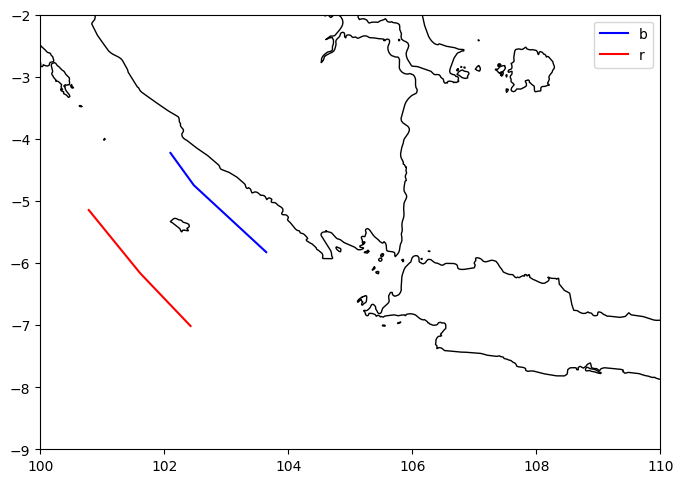

In [5]:
# matplotlib
fig, ax = plt.subplots(figsize=(8,8))

# plot basemap
shp_coast.plot(color='none', edgecolor='black', linewidth=1, ax=ax)

# check polygon
check_megathrust_delimiter(gdf_megathrusts, idx=0, delimiter_number=4, ax=ax)

In [6]:
idcs = [4, 6]
upper_configs = ['r', 'r']
megathrust_geoms = create_megathrust_coords(gdf_megathrusts, idcs, upper_configs, upper_depth=0, lower_depth=50)
print("terdapat ", len(megathrust_geoms), " megathrust")

variable_to_pkl(megathrust_geoms, "tmp_OQ003_megathrust_geoms.pkl")

terdapat  2  megathrust


## 5. Shallow Background

In [7]:
# open shallow background
gdf_shallow_background = gpd.read_file('./shp/shallow_background.shp')

shallow_background_geoms = [
    geom.exterior.xy for geom in gdf_shallow_background.geometry
]

variable_to_pkl(shallow_background_geoms, "tmp_OQ003_shallow_background_geoms.pkl")

## 6. Deep Background (intraslab)

In [8]:
# open deep background
gdf_deep_background = gpd.read_file('./shp/deep_background.shp')

deep_background_geoms = [
    geom.exterior.xy for geom in gdf_deep_background.geometry
]

variable_to_pkl(deep_background_geoms, "tmp_OQ003_deep_background_geoms.pkl")